In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [27]:
ads= pd.read_csv("advertising.csv")

In [28]:
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [29]:
ads.shape


(200, 4)

In [30]:
ads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [31]:
ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

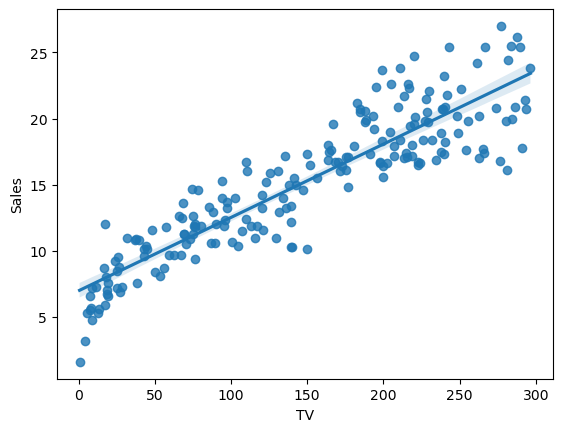

In [32]:
# visualizing data

sns.regplot(x="TV" , y="Sales", data=ads)

<Axes: xlabel='Newspaper', ylabel='Sales'>

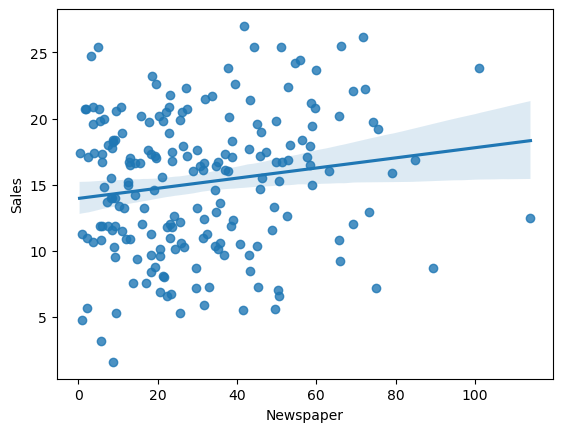

In [33]:
sns.regplot(x="Newspaper" , y="Sales", data=ads)

<Axes: xlabel='Radio', ylabel='Sales'>

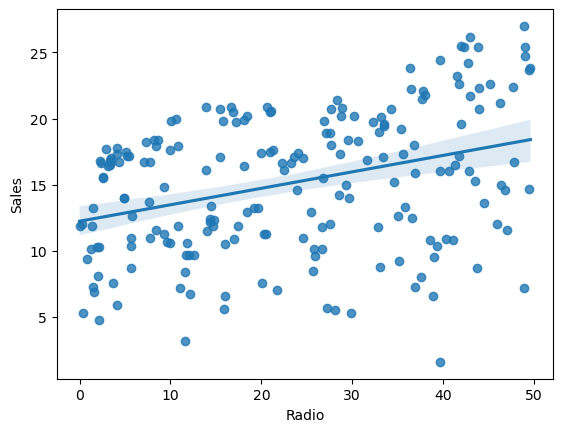

In [34]:
sns.regplot(x="Radio" , y="Sales", data=ads)

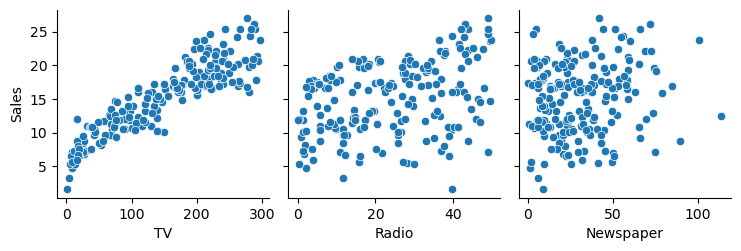

In [35]:
sns.pairplot(x_vars=["TV",'Radio','Newspaper'], y_vars="Sales", data=ads)

In [36]:
ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

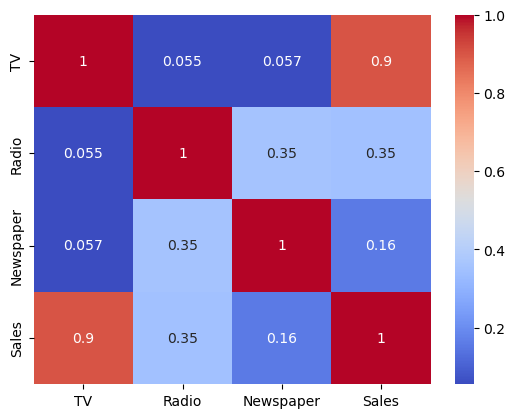

In [37]:
sns.heatmap(ads.corr(),annot=True,cmap= 'coolwarm')

## Building a Linear Regression Model

### Steps in building a linear regression model

- Create X and y,(X are the predictive variable , where y is the target variable)
- Create training data set and test data set (70:30 or 80:20)
- Train the model on the trainig set (learn the coefficient)
- Evaluate the model (using test set , traning set can also be used)

In [39]:
# Create X and y

X= ads['TV'] # as TV has strong linear correleation 
y= ads['Sales'] # Target variable



In [40]:
# Create training data set and test data set (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Train the model

- y= c+mx
- OLS stands for Ordinary Least Squares


In [55]:
X_train_sm = sm.add_constant(X_train) # using statsmodel library to add a const i-e 'c'
lr = sm.OLS(y_train, X_train_sm) # Creating a linear regression object with y_train and X_train_sm(with the added const)

lr_model=lr.fit() # fitting the linear regression model

In [56]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [64]:
# The realization of the expression y= c+mx for our case will be as below

# y= 6.95 + 0.054546.TV




In [57]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           1.52e-52
Time:                        18:36:13   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

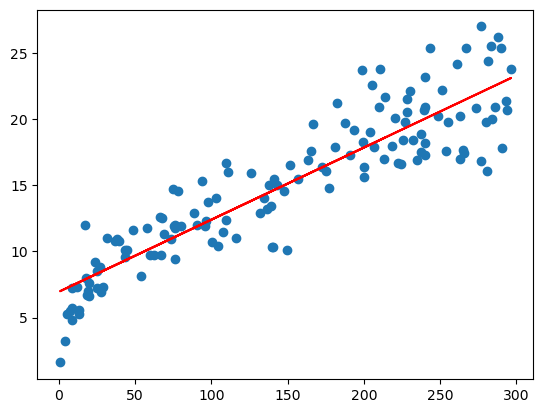

In [60]:
plt.scatter(X_train, y_train)
plt.plot(X_train ,6.948+0.0545*X_train,'r' )
plt.show()

### Residual Analysis

- error =difference of between y_train and y_pred --> f(y_train-y_train_pred)


In [66]:
y_train_pred= lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

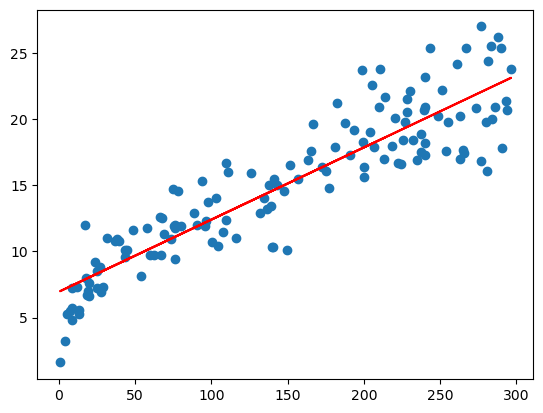

In [67]:
# Visualizing with y_train_pred, this is same as using the value "6.948+0.0545*X_train"

plt.scatter(X_train, y_train)
plt.plot(X_train ,y_train_pred, 'r' )
plt.show()

In [69]:
res= y_train -y_train_pred
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

Text(0.5, 1.0, 'Residual Analysis')

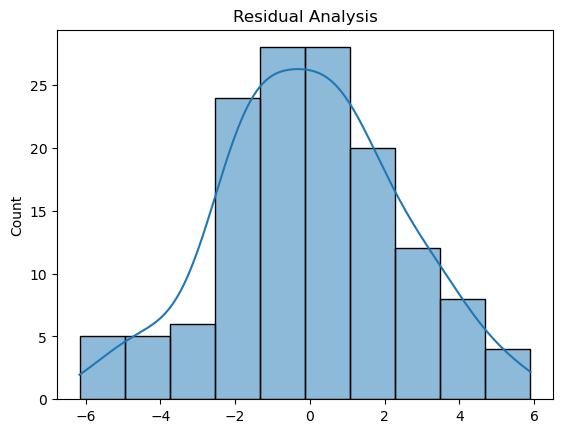

In [75]:
plt.figure()
sns.histplot(res,kde=True)
plt.title("Residual Analysis")

In [76]:
# To consider this case for a linear regression model

# The error terms should be of a normal distribution 
# The error terms should be independent , should not follow a pattern



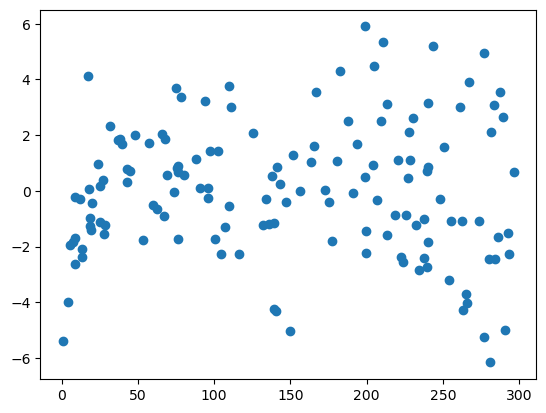

In [77]:
plt.figure()
plt.scatter(X_train, res)
plt.show()

## Predicting and Evaluating the model with the test set

- Add constant to test data set
- Evaluate the model by finding the R Squared
- R Squared of the test set should be within 5% of R Squared training set

In [81]:
X_test_sm=sm.add_constant(X_test)


In [82]:
y_test_pred= lr_model.predict(X_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [85]:
help(r2_score)

Help on function r2_score in module sklearn.metrics._regression:

r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)
    :math:`R^2` (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). In the general case when the true y is
    non-constant, a constant model that always predicts the average y
    disregarding the input features would get a :math:`R^2` score of 0.0.
    
    In the particular case when ``y_true`` is constant, the :math:`R^2` score
    is not finite: it is either ``NaN`` (perfect predictions) or ``-Inf``
    (imperfect predictions). To prevent such non-finite numbers to pollute
    higher-level experiments such as a grid search cross-validation, by default
    these cases are replaced with 1.0 (perfect predictions) or 0.0 (imperfect
    predictions) respectively. You can set ``force_finite`` to ``False`` to
    

In [86]:
# Evaluating R2 for test set
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7921031601245658

In [87]:
# Evaluating R2 for train set Note this is already calculated availble from the summary() function
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train

0.8157933136480389

In [88]:
# R Square of test data is within 5% of R2 Squared of training set.

# Hence our predictive model is reliable

### Same Model Building using Scikit libraries

- All the values we predicted using statsmodel libraries should match 


In [96]:
lm= LinearRegression() #creating an object for linear regression
# lm.fit(X_train,y_train) --> Throws error ,X_train shoild be an 2D array (140,1) we have (140, ), 
# hence reshape X_train and X_test



In [97]:
X_train_lm=  X_train.values.reshape(-1,1)
X_test_lm=  X_test.values.reshape(-1,1)

In [98]:
lm.fit(X_train_lm, y_train)

LinearRegression()

In [100]:
print(lm.coef_) # the value is similar to what we got using statsmodel

[0.05454575]


In [101]:
print(lm.intercept_) # the value is similar to what we got using statsmodel

6.9486832000013585


In [104]:
# making prediction

In [106]:
y_train_pred= lm.predict(X_train_lm)
y_test_pred= lm.predict(X_test_lm)

In [107]:
# Evaluting the r2 for test data

In [109]:
r2_train_lm = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train_lm

0.8157933136480388

In [110]:
r2_train_lm = r2_score(y_true=y_test, y_pred=y_test_pred)
r2_train_lm

0.792103160124566